## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [3]:
# Assuming 'distance_dataset.csv' is the name of your dataset file
file_path = 'distance_dataset.csv'

# Load the dataset into a Pandas DataFrame
distance_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(distance_df.head())

   Unnamed: 0         X         Y         Z  ClusterID
0           0  5.135779  4.167542  5.787635          4
1           1  4.280721  5.770909  6.091044          4
2           2  8.329098  7.540436  3.247239          2
3           3  5.470224  5.069249  5.768313          4
4           4  2.381797  2.402374  3.879101          1


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [4]:
# Assuming 'distance_df' is your DataFrame with columns 'X', 'Y', and 'Z'

# Create a 2D matrix with 'Y' and 'Z' columns
matrix_2d = distance_df[['Y', 'Z']].values

# Create a 3D matrix with 'X', 'Y', and 'Z' columns
matrix_3d = distance_df[['X', 'Y', 'Z']].values

# Display the matrices
print("2D Matrix:")
print(matrix_2d)

print("\n3D Matrix:")
print(matrix_3d)

2D Matrix:
[[4.16754224 5.7876354 ]
 [5.77090875 6.0910442 ]
 [7.54043595 3.2472394 ]
 ...
 [2.35191142 6.77931097]
 [5.64267723 4.85577967]
 [5.27055029 7.84476766]]

3D Matrix:
[[5.13577939 4.16754224 5.7876354 ]
 [4.2807207  5.77090875 6.0910442 ]
 [8.3290979  7.54043595 3.2472394 ]
 ...
 [2.00018573 2.35191142 6.77931097]
 [4.73591658 5.64267723 4.85577967]
 [4.955436   5.27055029 7.84476766]]


Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [6]:
# Reference planes
reference_plane_2d = np.array([[5, 5]])
reference_plane_3d = np.array([[5, 5, 5]])

# Calculate cosine similarity
cosine_similarity_2d = cosine_similarity(matrix_2d, reference_plane_2d)
cosine_similarity_3d = cosine_similarity(matrix_3d, reference_plane_3d)

# Subtract from 1 to get new features
new_feature_2d = 1 - cosine_similarity_2d
new_feature_3d = 1 - cosine_similarity_3d

# Add new features to the DataFrame
distance_df['new_feature_2d'] = new_feature_2d
distance_df['new_feature_3d'] = new_feature_3d

# Display the updated DataFrame
print(distance_df.head())

   Unnamed: 0         X         Y         Z  ClusterID  new_feature_2d  \
0           0  5.135779  4.167542  5.787635          4        0.012985   
1           1  4.280721  5.770909  6.091044          4        0.000364   
2           2  8.329098  7.540436  3.247239          2        0.070875   
3           3  5.470224  5.069249  5.768313          4        0.002074   
4           4  2.381797  2.402374  3.879101          1        0.026539   

   new_feature_3d  
0        0.008640  
1        0.010576  
2        0.056269  
3        0.001385  
4        0.028225  


Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

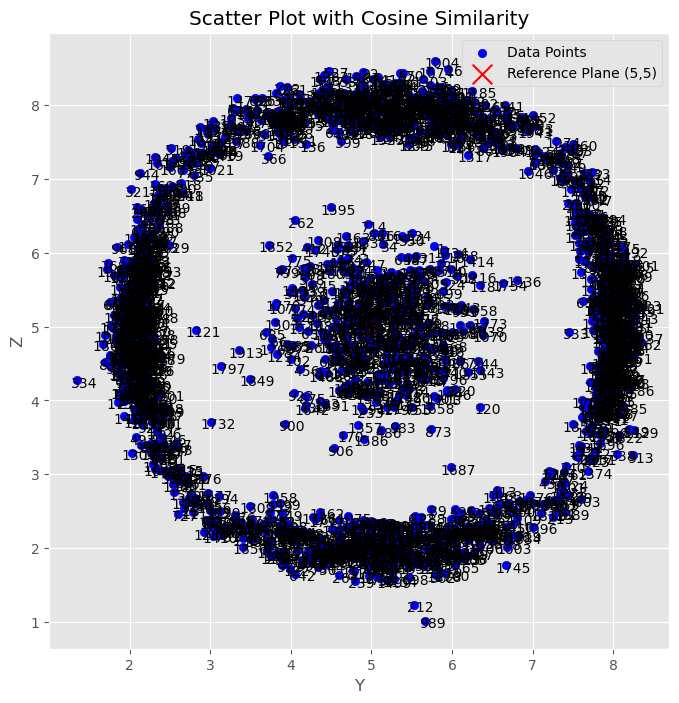

In [ ]:
# Scatter plot for 2D matrix and reference plane (5,5)
plt.figure(figsize=(8, 8))

# Scatter plot of the 2D matrix
plt.scatter(matrix_2d[:, 0], matrix_2d[:, 1], label='Data Points', color='blue')

# Plot the reference plane (5,5)
plt.scatter(5, 5, label='Reference Plane (5,5)', color='red', marker='x', s=200)

# Annotate points with their index for better understanding
for i, (x, y) in enumerate(matrix_2d):
    plt.annotate(i, (x, y), textcoords="offset points", xytext=(5,-5), ha='center')

plt.title('Scatter Plot with Cosine Similarity')
plt.xlabel('Y')
plt.ylabel('Z')
plt.legend()
plt.grid(True)
plt.show()

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

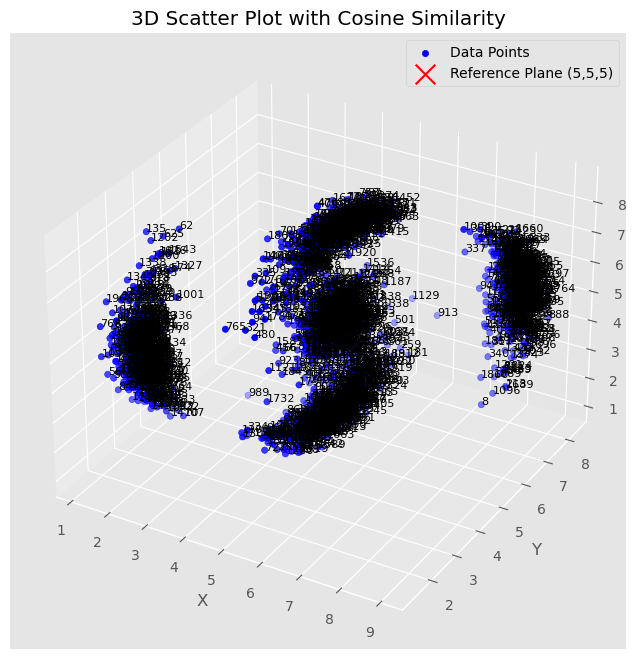

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for the 3D matrix and reference plane (5,5,5)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the 3D matrix
ax.scatter(matrix_3d[:, 0], matrix_3d[:, 1], matrix_3d[:, 2], label='Data Points', c='blue', marker='o')

# Plot the reference plane (5,5,5)
ax.scatter(5, 5, 5, label='Reference Plane (5,5,5)', color='red', marker='x', s=200)

# Annotate points with their index for better understanding
for i, (x, y, z) in enumerate(matrix_3d):
    ax.text(x, y, z, str(i), color='black', fontsize=8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot with Cosine Similarity')
ax.legend()

plt.show()

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 0','Document 1'])

/Users/mustafazafar/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

/Users/mustafazafar/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [16]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace the content of Document 0 and Document 1
Document0 = "Natural language processing (NLP) is a field of artificial intelligence (AI) that focuses on the interaction between computers and humans using natural language."
Document1 = "Machine learning is a subset of artificial intelligence that involves the use of algorithms and statistical models to enable computers to perform tasks without explicit programming."

# Combine the documents into a corpus
corpus_new = [Document0, Document1]

# Create an instance of TfidfVectorizer
vectorizer_new = TfidfVectorizer()

# Transform the new documents into a TF-IDF matrix
trsfm_new = vectorizer_new.fit_transform(corpus_new)

# Calculate cosine similarity between the first document and all documents
similarity_scores_new = cosine_similarity(trsfm_new[0:1], trsfm_new)

# Convert the result to a DataFrame for better visualization
similarity_df_new = pd.DataFrame(similarity_scores_new, columns=['Document 0', 'Document 1'], index=['Document 0'])

# Display the updated DataFrame
print(similarity_df_new)

            Document 0  Document 1
Document 0         1.0    0.199862


 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
count_vectorizer = CountVectorizer()

# Transform the new corpus into a document-term matrix (DTM)
dtm_new = count_vectorizer.fit_transform(corpus_new)

# Convert the DTM to a Pandas DataFrame for better visualization
dtm_df_new = pd.DataFrame(dtm_new.toarray(), columns=count_vectorizer.get_feature_names(), index=['Document 0', 'Document 1'])

# Display the DataFrame
print(dtm_df_new)

            ai  algorithms  and  artificial  between  computers  enable  \
Document 0   1           0    1           1        1          1       0   
Document 1   0           1    1           1        0          1       1   

            explicit  field  focuses  ...  programming  statistical  subset  \
Document 0         0      1        1  ...            0            0       0   
Document 1         1      0        0  ...            1            1       1   

            tasks  that  the  to  use  using  without  
Document 0      0     1    1   0    0      1        0  
Document 1      1     1    1   2    1      0        1  

[2 rows x 35 columns]


/Users/mustafazafar/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [20]:
# Convert the DTM to a Pandas DataFrame
dtm_df = pd.DataFrame(dtm_new.toarray(), columns=count_vectorizer.get_feature_names(), index=['Document 0', 'Document 1'])

# Display the DataFrame
print(dtm_df)

            ai  algorithms  and  artificial  between  computers  enable  \
Document 0   1           0    1           1        1          1       0   
Document 1   0           1    1           1        0          1       1   

            explicit  field  focuses  ...  programming  statistical  subset  \
Document 0         0      1        1  ...            0            0       0   
Document 1         1      0        0  ...            1            1       1   

            tasks  that  the  to  use  using  without  
Document 0      0     1    1   0    0      1        0  
Document 1      1     1    1   2    1      0        1  

[2 rows x 35 columns]


/Users/mustafazafar/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [21]:
# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the count vectors into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(corpus_new)

# Convert the TF-IDF vectors to a Pandas DataFrame
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=['Document 0', 'Document 1'])

# Display the DataFrame
print(tfidf_df)

                  ai  algorithms       and  artificial   between  computers  \
Document 0  0.212959    0.000000  0.151522    0.151522  0.212959   0.151522   
Document 1  0.000000    0.205983  0.146559    0.146559  0.000000   0.146559   

              enable  explicit     field   focuses  ...  programming  \
Document 0  0.000000  0.000000  0.212959  0.212959  ...     0.000000   
Document 1  0.205983  0.205983  0.000000  0.000000  ...     0.205983   

            statistical    subset     tasks      that       the        to  \
Document 0     0.000000  0.000000  0.000000  0.151522  0.151522  0.000000   
Document 1     0.205983  0.205983  0.205983  0.146559  0.146559  0.411967   

                 use     using   without  
Document 0  0.000000  0.212959  0.000000  
Document 1  0.205983  0.000000  0.205983  

[2 rows x 35 columns]


/Users/mustafazafar/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [22]:
#from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between all documents
similarity_matrix = cosine_similarity(tfidf_vectors)

# Convert the similarity matrix to a Pandas DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, columns=['Document 0', 'Document 1'], index=['Document 0', 'Document 1'])

# Display the DataFrame
print(similarity_df)

            Document 0  Document 1
Document 0    1.000000    0.199862
Document 1    0.199862    1.000000
